# Objetivos del estudio:

El test A/B tiene como finalidad mostrar si la inclusión de un sistema de recomendaciones mejorado puede causar al menos un aumento del 10% en la conversión de vistas en la página, agregar  artículos y compras. Es decir,  comprobar si con el sistema de recomendaciones se puede mejorar la conversión en las tres etapas del embudo :product_page, product_card y purchase.

In [86]:
# importar librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm


# Paso 1: Carga y exploracion de los datos

* Cargar los datos:

In [87]:
# Función para cargar datos desde un enlace de Drive con pandas 
def cargar_datos(url):
    try:
        path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
        data = pd.read_csv(path)
        return data     
    except Exception as e:
        print(f"Error al carga datos del {url}: {e}")
        return None
    
    
#LLamamos la funcion para cargar los datos y definimos nuestos dataframes.
usuarios = cargar_datos('https://drive.google.com/file/d/1JC8X7u3Cwl4UpOWl21NdIlMdKJGc09By/view?usp=sharing')
participantes = cargar_datos('https://drive.google.com/file/d/178U2Xc_kBA-xICMUod7GsMZxRxEjIAkB/view?usp=sharing')
eventos = cargar_datos('https://drive.google.com/file/d/1QL1IkDn_yz_7UKv9NX0BCS_t4EjtUTxS/view?usp=sharing')
marketing = cargar_datos('https://drive.google.com/file/d/1YBbHUgvZVOldCV5gi_F_wd68PmdoUlzj/view?usp=sharing')


In [88]:
# Función para leer la info basica de los df

def leer_df(df,name):
    print(f'====== Información del DataFrame: {name} =======')
    df.info()
    print(df.describe())
    display(df.head())
    print('\n\n')

# Llamamos la funcion y observamos la info de los dataframes
leer_df(usuarios,'Usuarios')
leer_df(participantes,'Participantes')  
leer_df(eventos,'Eventos')
leer_df(marketing,'Marketing')


====== Información del DataFrame: Usuarios =======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
                 user_id  first_date region   device
count              58703       58703  58703    58703
unique             58703          17      4        4
top     8F04273BB2860229  2020-12-21     EU  Android
freq                   1        6077  43396    26159


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone





====== Información del DataFrame: Participantes =======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     FABB6D49B11E673F      A  interface_eu_test
freq                   2   8214              10850


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test





====== Información del DataFrame: Eventos =======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
            details
count  60314.000000
mean      23.881219
std       72.228884
min        4.990000
25%        4.990000
50%        4.990000
75%        9.990000
max      499.990000


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99





====== Información del DataFrame: Marketing =======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes
                            name regions    start_dt   finish_dt
count                         14      14          14          14
unique                        14       6          14          14
top     Christmas&New Year Promo    APAC  2020-12-25  2021-01-03
freq                           1       4           1           1


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


* Exploracion de datos :

Establecer los datos de fechas de cada df al tipo de dato correspondiente (datetime)

In [89]:
#cambiar columnas de fecha a formato datetime
usuarios['first_date'] = pd.to_datetime(usuarios['first_date'],format='%Y-%m-%d')
marketing['start_dt'] = pd.to_datetime(marketing['start_dt'],format='%Y-%m-%d')
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'], format='%Y-%m-%d')


#cambiar columnas de fecha a formato datetime y hora
eventos['event_dt'] = pd.to_datetime(eventos['event_dt'], format='%Y-%m-%d %H:%M:%S')



Examinar los valores nulos y duplicados :


In [90]:
#funcion para verificar valores nulos y duplicados

def nulos_y_duplicados(df):
    nulos = df.isnull().sum()
    duplicados = df.duplicated().sum()
    print(f'valores nulos por columnas:\n{nulos}\n')
    print(f'valores duplicados:\n{duplicados}\n')

print(f'=== USUARIOS ===')
nulos_y_duplicados(usuarios)
print(f'=== EVENTOS ===')
nulos_y_duplicados(eventos)
print(f'=== MARKETING ===')
nulos_y_duplicados(marketing)
print(f'=== PARTICIPANTES ===')
nulos_y_duplicados(participantes)


=== USUARIOS ===
valores nulos por columnas:
user_id       0
first_date    0
region        0
device        0
dtype: int64

valores duplicados:
0

=== EVENTOS ===
valores nulos por columnas:
user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

valores duplicados:
0

=== MARKETING ===
valores nulos por columnas:
name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

valores duplicados:
0

=== PARTICIPANTES ===
valores nulos por columnas:
user_id    0
group      0
ab_test    0
dtype: int64

valores duplicados:
0



### Tratamientos en las tablas:

### 1) Valores nulos en dataframe 'Eventos'


De acuerdo a los resultados anteriores la tabla eventos tiene valores nulos en la columna 'details'. Por consiguiente debemos:

* Verificar  el patron de los valores ausentes


In [91]:

#Muestra random del dataset
print(eventos.sample(10))
print('\n')

#Calcula el porcenaje de los NaN  en toda la columna details
print(f'Porcentaje de valores nulos en "details": {eventos['details'].isnull().mean()*100}') # calcula el porcentaje de valores nulos en la columna details
print('\n')

#Cuenta los valores nulos por cada evento
nulos_por_eventos = eventos.groupby('event_name')['details'].apply(lambda x: x.isnull().sum()) # Cuenta los valores nulos de cada evento
valores_por_eventos = eventos.groupby('event_name')['details'].count() # Cuenta los valores NO nulos de cada evento

#Une las dos tablas anteriores
valores_details_por_evento = pd.DataFrame({
    'no_nulos': valores_por_eventos,
    'nulos': nulos_por_eventos
})

print(valores_details_por_evento)




                 user_id            event_dt    event_name  details
300320  B24A43487A573E12 2020-12-15 09:30:21         login      NaN
2684    F2787D838283515C 2020-12-08 07:00:34      purchase     4.99
355759  42FAA08C27DE415F 2020-12-20 15:23:50         login      NaN
95841   A0C453A9E208C540 2020-12-20 12:44:44  product_cart      NaN
354272  40DBC537C8244118 2020-12-20 01:36:07         login      NaN
152411  2F15AEF27E42B917 2020-12-14 10:34:35  product_page      NaN
117880  5925210CDCC4DE44 2020-12-28 09:10:29  product_cart      NaN
45559   75119F86D0060AAE 2020-12-22 21:57:35      purchase     4.99
401546  02F97A9912D878F8 2020-12-24 07:10:06         login      NaN
329751  90B5CE81EFAA4F07 2020-12-18 03:06:46         login      NaN


Porcentaje de valores nulos en "details": 85.76697714041642


              no_nulos   nulos
event_name                    
login                0  182465
product_cart         0   60120
product_page         0  120862
purchase         60314       0


Lo valores nulos corresponde solo a la columna details, la cual indica el monto de la compra. Por lo tanto, en todas aquellas etapa del embudo tendran valores nulos, en excepcion a 'purchase'.  En consecuencia, no es necesario el tratamiento o limpiezas de los valores nulos 

### 2) Examinar de datos del dataframe' Eventos'
Las fechas de inicio y fin deben coincidir con las fechas establecidas en la prueba

In [92]:
# Fechas oficiales de la prueba:
    # Lanzamiento: 2020-12-07
    # Finalización: 2021-01-01


# Encuentra el valor minimo y máximo en la columna 'event_dt'
fecha_min = eventos['event_dt'].min()

fecha_max = eventos['event_dt'].max()

print(f"Inicio y fin de las acciones que contiene el df eventos : desde {fecha_min} hasta {fecha_max}")


Inicio y fin de las acciones que contiene el df eventos : desde 2020-12-07 00:00:33 hasta 2020-12-30 23:36:33


La ultima fecha que tiene registarada la tabla eventos pertenece al dia: 30 de diciembre del 2020 a las 23:36 hrs. Esto nos indica que la fecha de finalizacion ya establecida en la prueba no se llevo a cabo. por lo que tendremos un dia faltante el 31 de diciembre 2020 pero podriamos suponer que en este dia por ser feriado hubo una complicacion en la  recepcion de datos o no hubo compras.

### 3) Extraccion de datos del dataframe 'Participantes':
* Filtra los usuarios de la prueba a/b  que realizaron la prueba :'recommender_system_test'


In [93]:
#Filtra la tabla parcipantes:  obtener el grupo A y B de la prueba 'recommender_system_test'
filtro_participantes = participantes[(participantes['group'].isin(['A' , 'B'])) & (participantes['ab_test'] == 'recommender_system_test')]
print(filtro_participantes.sample(10))

               user_id group                  ab_test
1340  368A35909794ABE2     A  recommender_system_test
175   FEC0BCA6C323872F     A  recommender_system_test
1942  A834224E54F9BC95     A  recommender_system_test
3072  C50CBD7B62641D4D     A  recommender_system_test
740   2FF689ED322323BF     A  recommender_system_test
776   84C13EFBE76DF52F     A  recommender_system_test
2053  13FBEB715F4AAE10     B  recommender_system_test
1712  C48D82CC09586152     A  recommender_system_test
2682  AD7CAF6EC4B62FF9     A  recommender_system_test
2115  379DD24A17E07C86     B  recommender_system_test


* Verifica si hay una posible contaminacion de los grupos (usuarios que se encuentran en ambos grupos)

In [94]:

# verificar si hay usuarios duplicados  en ambos grupos en la tabla filtrada por la prueba :
#Separar los usuarios por grupo
grupo_A = set(filtro_participantes[filtro_participantes['group'] == 'A']['user_id'].unique()) #filtar los usuarios unicos del grupo A
grupo_B = set(filtro_participantes[filtro_participantes['group'] == 'B']['user_id'].unique()) #filtar los usuarios unicos del grupo B
duplicados = grupo_A & grupo_B  #interseccion de ambos grupos para encontrar usuarios duplicados
print(f"Usuarios unicos en grupo A: {len(grupo_A)}")
print(f"Usuarios únicos en grupo B: {len(grupo_B)}")


print(f"Usuarios que aparecen en ambos grupos: {len(duplicados)}")
print(f"Porcentaje de contaminación: {len(duplicados)/len(grupo_A | grupo_B)*100:.2f}%")


Usuarios unicos en grupo A: 2747
Usuarios únicos en grupo B: 928
Usuarios que aparecen en ambos grupos: 0
Porcentaje de contaminación: 0.00%


### 4) Extraccion de datos del Df 'Usuarios':

* La tabla de usuarios nos indica los nuevos usuarios que participarultion en la prueba. Es importante tomar aquellos usuarios que se inscribieron en la prueba desde el 07  hasta el 21 de diciembre de 2020

In [95]:
#final_ab_new_users_upd_us.csv — todos los usuarios que se registraron 
#en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020

ultima_fecha_registrada =  usuarios['first_date'].max()
print (f'Ultima fecha de registro que almacena el df usuarios: {ultima_fecha_registrada}')



Ultima fecha de registro que almacena el df usuarios: 2020-12-23 00:00:00


### 5) Union de los dataframes para continuar con el analisis explotarios de datos:

1 ) Union de los Df usuarios y participantes:

In [96]:
#Une los dataframes participantes y usuarios
grupos_user = filtro_participantes.merge(filtro_user, on='user_id', how='inner') #une  los partcipantes las prueba 'recommender_system_tes' (tablas participante) que se registarion antes del 21 de Diciembre2020 (tabla usuarios)


1.2) Filtrar el nuevo df grupos_user

In [ ]:
#Extrae los nuevos usuarios de Europa
grupos_user =  grupos_user[grupos_user['region'] == 'EU']

#Filtra solo aquellos nuevos usuarios en Europa que se registraton el dia de cierre o antes
grupos_user = grupos_user[grupos_user['first_date'] <= '2020-12-21']

#Seleccionar solo el 15% de los  nuevos usuarios de Europa que cumpla con el cierre de registro
grupos_user = grupos_user.sample(frac=0.15, random_state=42)



78
12


1.3) Unir df grupos_user con la tabla de eventos

In [98]:
#une con el df eventos
df = eventos.merge(grupos_user, on='user_id',how='inner') # Une los df anteriores que realizaron eventos (tabla Eventos)
display(df.head())



,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,B,recommender_system_test,2020-12-07,EU,iPhone
1,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,B,recommender_system_test,2020-12-07,EU,PC
2,C7CB2F1BA42F102B,2020-12-07 03:05:05,purchase,99.99,B,recommender_system_test,2020-12-07,EU,iPhone
3,CF03E97B314C5632,2020-12-07 13:36:54,purchase,4.99,B,recommender_system_test,2020-12-07,EU,Android
4,68373F4331DDD2E6,2020-12-07 10:19:55,purchase,99.99,A,recommender_system_test,2020-12-07,EU,iPhone


1.4) Filtrar la tabla df, la cual sera la tabla definitiva para trabajar con los analisis

In [99]:
#filtrar por  el periodo de la duracion de la prueba: (desde 2020-12-07 hasta 2021-01-01):

# 1.4.1 Declara variables con la fechas de inicio y fin  de acuerdo con la ficha tecnica
fecha_inicio = pd.to_datetime('2020-12-07',format = '%Y-%m-%d' )
fecha_fin = pd.to_datetime('2021-01-01',format = '%Y-%m-%d')

# 1.4.2 extrae solo los eventos que se encuentre en las variables declaradas
df = df[(df['event_dt'] >= fecha_inicio ) & (df['event_dt'] <= fecha_fin)]
display(df.head())

#filtrar  los usuarios que tuvieron 14 dias de observados: 

# 1.4.3 Agregamos la columna dias_desde_registro al df ya que nos indicara  los dias desde la primera accion hasta el evento siguiente de cada usuario
df ['dias_desde_registro'] = (df['event_dt'] - df['first_date']).dt.days
# 1.4.4 Filtraremos aquellos usuarios que tengan al menos  14 dias  de observados
df = df[df['dias_desde_registro'] == 14]
print (df.head())

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,B,recommender_system_test,2020-12-07,EU,iPhone
1,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,B,recommender_system_test,2020-12-07,EU,PC
2,C7CB2F1BA42F102B,2020-12-07 03:05:05,purchase,99.99,B,recommender_system_test,2020-12-07,EU,iPhone
3,CF03E97B314C5632,2020-12-07 13:36:54,purchase,4.99,B,recommender_system_test,2020-12-07,EU,Android
4,68373F4331DDD2E6,2020-12-07 10:19:55,purchase,99.99,A,recommender_system_test,2020-12-07,EU,iPhone


              user_id            event_dt    event_name  details group  \
284  89143F0AEFE3B11D 2020-12-21 19:44:22      purchase     4.99     B   
352  FCFCADE5FBB3D95A 2020-12-22 15:31:34      purchase    99.99     A   
444  EFA2387919DBD7A3 2020-12-28 11:15:41      purchase     4.99     A   
445  D77FA24D30E799BA 2020-12-28 20:22:55      purchase     4.99     A   
763  DEC8CD55F35F2087 2020-12-21 10:57:56  product_cart      NaN     B   

                     ab_test first_date region   device  dias_desde_registro  
284  recommender_system_test 2020-12-07     EU   iPhone                   14  
352  recommender_system_test 2020-12-08     EU   iPhone                   14  
444  recommender_system_test 2020-12-14     EU  Android                   14  
445  recommender_system_test 2020-12-14     EU  Android                   14  
763  recommender_system_test 2020-12-07     EU  Android                   14  


## Paso 2: Análisis Exploratorio de Datos (EDA)

* Estudia la conversión en las diferentes etapas del embudo.

In [100]:
# Separa eventos por grupo
events_A = df[df['group'] == 'A']
events_B = df[df['group'] == 'B']

print(f"Eventos grupo A: {len(events_A)}")
print(f"Eventos grupo B: {len(events_B)}")

#Funcion para calcular conversiones por grupo

def calcular_conversiones_por_grupo(df_eventos):
    """
    Calcula las conversiones para cada etapa del embudo
    """
    # Usuarios únicos en cada etapa
    usuarios_login = df_eventos[df_eventos['event_name'] == 'login']['user_id'].nunique()
    usuarios_page = df_eventos[df_eventos['event_name'] == 'product_page']['user_id'].nunique()
    usuarios_cart = df_eventos[df_eventos['event_name'] == 'product_cart']['user_id'].nunique()
    usuarios_purchase = df_eventos[df_eventos['event_name'] == 'purchase']['user_id'].nunique()
    
    return {
        'usuarios_login': usuarios_login,
        'usuarios_page': usuarios_page,
        'usuarios_cart': usuarios_cart,                
        'usuarios_purchase': usuarios_purchase,
        'tasa_login_to_page': round((usuarios_page / usuarios_login * 100), 2) if usuarios_login > 0 else 0,
        'tasa_page_to_cart': round((usuarios_cart / usuarios_page * 100), 2) if usuarios_page > 0 else 0,
        'tasa_cart_to_purchase': round((usuarios_purchase / usuarios_cart * 100), 2) if usuarios_cart > 0 else 0,
        'tasa_page_to_purchase': round((usuarios_purchase / usuarios_page * 100), 2) if usuarios_page > 0 else 0
    }

# Calcular para cada grupo
conversiones_A = calcular_conversiones_por_grupo(events_A)
conversiones_B = calcular_conversiones_por_grupo(events_B)

print("Grupo A:", conversiones_A)
print("Grupo B:", conversiones_B)


Eventos grupo A: 17
Eventos grupo B: 13
Grupo A: {'usuarios_login': 7, 'usuarios_page': 5, 'usuarios_cart': 2, 'usuarios_purchase': 3, 'tasa_login_to_page': 71.43, 'tasa_page_to_cart': 40.0, 'tasa_cart_to_purchase': 150.0, 'tasa_page_to_purchase': 60.0}
Grupo B: {'usuarios_login': 8, 'usuarios_page': 3, 'usuarios_cart': 1, 'usuarios_purchase': 1, 'tasa_login_to_page': 37.5, 'tasa_page_to_cart': 33.33, 'tasa_cart_to_purchase': 100.0, 'tasa_page_to_purchase': 33.33}


* ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?  

            user_id group  num_eventos
0  1576666870A32FCF     B            2
1  290326A9104DB872     A            2
2  4A53CB855B71A848     B            1
3  65A33D1E2F637CE6     A            2
4  7342090A9E50B657     B            1




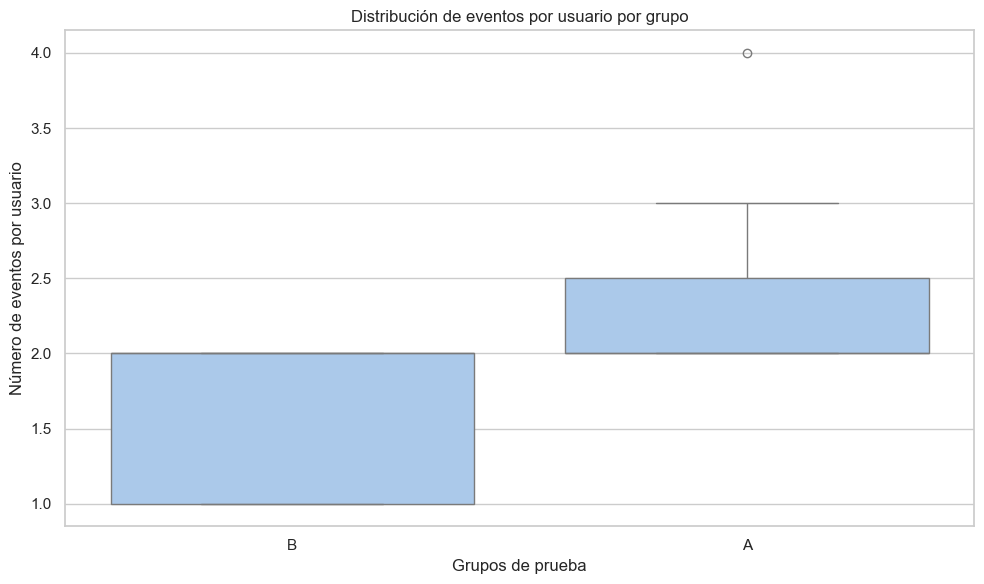

In [101]:
#Calcula los eventos por usuario en cada grupo
eventos_por_usuario = df.groupby(['user_id', 'group'])['event_name'].count().reset_index()
eventos_por_usuario.columns = ['user_id', 'group', 'num_eventos']
print(eventos_por_usuario.head())
print('\n')
#Compara las distribuciones
eventos_por_usuario.groupby('group')['num_eventos'].describe()

# Histograma comparativo
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="pastel")

sns.boxplot(data=eventos_por_usuario, x='group', y='num_eventos')
plt.title('Distribución de eventos por usuario por grupo')
plt.xlabel('Grupos de prueba', fontsize=12)
plt.ylabel('Número de eventos por usuario', fontsize=12)

plt.tight_layout()
plt.show()


- En Grupo A, algunos usuarios interactuaron mucho más con el sistema (más eventos por usuario).
- En Grupo B, la interacción fue más homogénea y limitada.



* ¿Hay usuarios que están presentes en ambas muestras?

In [102]:
#verifica nuevamente si hay usuarios en ambas muestras
usuarios_grupo_a = set(df[df['group'] == 'A']['user_id'].unique())
usuarios_grupo_b = set(df[df['group'] == 'B']['user_id'].unique())        
usuarios_comunes = usuarios_grupo_a & usuarios_grupo_b
print(f'Usuarios comunes en ambos grupos: {len(usuarios_comunes)}')

Usuarios comunes en ambos grupos: 0


* ¿Cómo se distribuye el número de eventos entre los días?

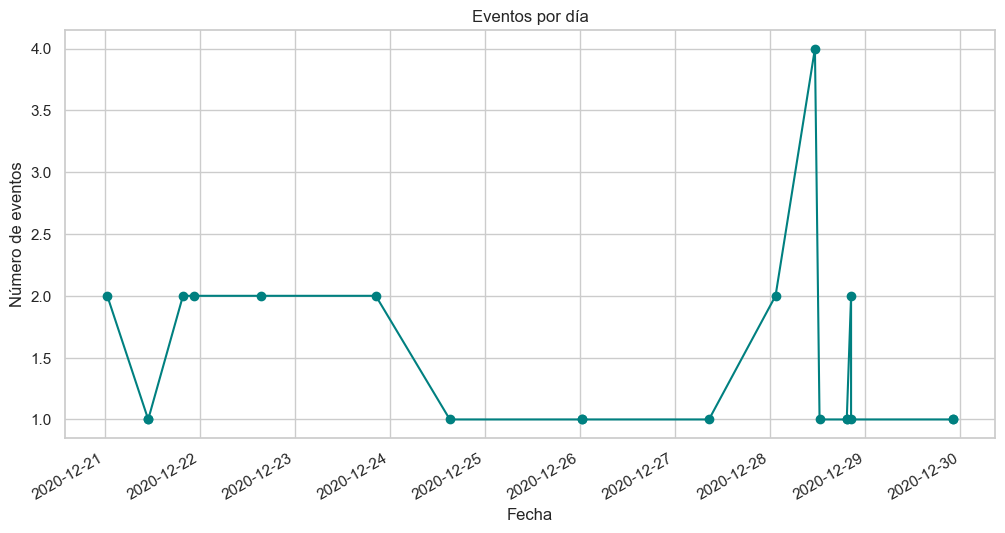

In [103]:
#distribucion de numero de eventos entre los dias
eventos_por_dia = df.groupby('event_dt').size().sort_index()

# Visualización de la distribución de eventos por día
eventos_por_dia.plot(kind='line', marker='o', figsize=(12, 6), color='teal')
plt.title('Eventos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.grid(True)
plt.show()



* ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

1) Verificar si hubo campanas publicitarias durante el periodo de prueba:

In [104]:
# Define el rango de fechas de la prueba A/B
fecha_inicio = fecha_min.date() #fecha_min y fecha_max ya se difinio al momento de la extraccion de datos de df eventos
fecha_fin = fecha_max.date()

# Identifica campañas que se superponen con la prueba A/B
campana = ((marketing['start_dt'].dt.date <= fecha_fin) & 
                   (marketing['finish_dt'].dt.date >= fecha_inicio))

campanas_durante_prueba = marketing[campana]

# Verificar los resultados
print(f"Número de campañas durante la prueba: {len(campanas_durante_prueba)}")
print("\nCampañas encontradas:")
print(campanas_durante_prueba)


Número de campañas durante la prueba: 2

Campañas encontradas:
                         name        regions   start_dt  finish_dt
0    Christmas&New Year Promo  EU, N.America 2020-12-25 2021-01-03
10  CIS New Year Gift Lottery            CIS 2020-12-30 2021-01-07


2) Examinar si los grupos tienen tamaños similares :

In [105]:

# cantidad de usuarios por grupo 
distribucion = df.groupby('group')['user_id'].nunique()
print("Cantida de usuarios por grupo:")
print(distribucion)

Cantida de usuarios por grupo:
group
A    7
B    8
Name: user_id, dtype: int64


3) Durante el periodo de prueba el tiempo fue suficiente?

In [106]:
#Todos los usuarios tuvieron 14 días completos para ser observados?

rango_observacion = df.groupby('user_id')['event_dt'].agg(['min', 'max'])
rango_observacion['dias_observados'] = (rango_observacion['max'] - rango_observacion['min']).dt.days

usuarios_14_dias = rango_observacion[rango_observacion['dias_observados'] < 15 ]
print(f"Usuarios con 14 días observados: {usuarios_14_dias.shape[0]}")
print(f"Porcentaje de usuarios con 14 días observados: {usuarios_14_dias.shape[0] / rango_observacion.shape[0] * 100:.2f}%")

print('\n')

Usuarios con 14 días observados: 15
Porcentaje de usuarios con 14 días observados: 100.00%




## Paso 3 :
* Evaluar los resultados de la prueba A/B:

Grupo A muestra mejor rendimiento en todas las etapas del embudo, especialmente en la conversión final. La tasa de carrito → compra supera  al 100% en Grupo A, esto puede sugerir que algunos usuarios compraron sin pasar por el carrito.Mientras que el Grupo B tiene más logins pero menos interacción posterior, lo que podría indicar problemas de retención o experiencia de usuario.


* Prueba z para comprobar la diferencia estadística entre las proporciones.

In [107]:
#Hipotesis:
#Hipotesis nula(H0) :No existe una diferencia significativa entre las proporciones
#Hipotesis alternativa (H1) : Esxiste una diferencia significativa entre la proporciones


#nivel de significancia
alpha = 0.05

# Proporciones de conversión (purchase/login)
p1 = conversiones_A['usuarios_purchase'] / conversiones_A['usuarios_login']  
p2 = conversiones_B['usuarios_purchase'] / conversiones_B['usuarios_login']
print(f"Proporción Grupo A (p1): {p1:.4f}")
print(f"Proporción Grupo B (p2): {p2:.4f}")

#proporcion combinada
p_combined = (conversiones_A['usuarios_purchase'] + conversiones_B['usuarios_purchase']) / (conversiones_A['usuarios_login'] + conversiones_B['usuarios_login'])

#Error estándar
se = np.sqrt(p_combined * (1 - p_combined) * (1/conversiones_A['usuarios_login'] + 1/conversiones_B['usuarios_login']))

# Estadístico z
z_stat = (p1 - p2) / se

print(f'Proporción combinada: {p_combined: .4f}')
print(f'Error estándar : {se:.4f}')
print(f'Estadístico z: {z_stat:.4f}')

p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print(f"P-value: {p_value:.4f}")

if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

Proporción Grupo A (p1): 0.4286
Proporción Grupo B (p2): 0.1250
Proporción combinada:  0.2667
Error estándar : 0.2289
Estadístico z: 1.3264
P-value: 0.1847
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
